### Understanding
### 1) What technologies do the top 20% of the highest-paid data scientists use?
### 2) What is the primary operating system in which they work?
### 3) How did they approach learning?

## Gathering the Data 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams, style
%matplotlib inline
import seaborn as sns
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
so = pd.read_csv('datasets/stackover_anudevsurv_2021/survey_results_public.csv')
so_schema = pd.read_csv('datasets/stackover_anudevsurv_2021/survey_results_schema.csv')

## Assessing the Data

In [3]:
so.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [4]:
so_schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [5]:
kaggle = pd.read_csv('datasets/kaggle-survey-2021/kaggle_survey_2021_responses.csv', low_memory=False)
kaggle.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [6]:
print('so shape: ', so.shape)
print('kaggle shape: ', kaggle.shape)

so shape:  (83439, 48)
kaggle shape:  (25974, 369)


### Understanding the Data

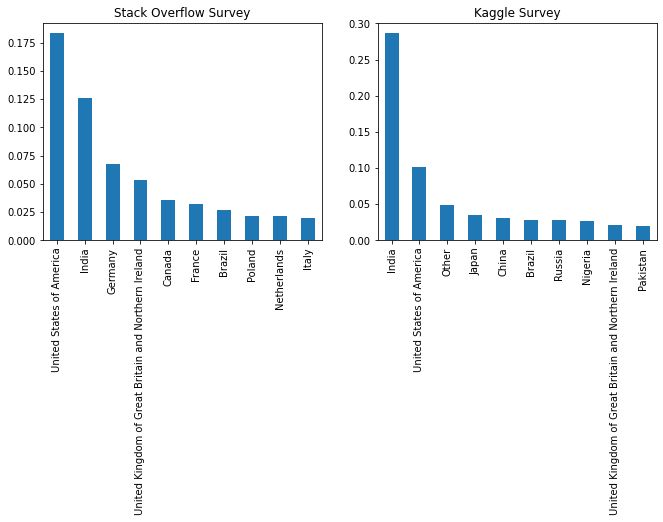

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))

plt.subplot(1, 2, 1)
count_vals = so['Country'].value_counts()
(count_vals[:10]/so.shape[0]).plot(kind="bar", ax=ax1);
ax1.set_title('Stack Overflow Survey')

plt.subplot(1, 2, 2)
count_vals = kaggle['Q3'].value_counts()
(count_vals[:10]/kaggle.shape[0]).plot(kind="bar", ax=ax2);
ax2.set_title('Kaggle Survey');

In both surveys, USA and India are the countries that most participated. Brazil and the UK with a high number of participants as well.
Other than that, both surveys seem to have targeted different populations with more emerging countries on the Kaggle survey. It is going to be very helpful to evaluate both datasets.

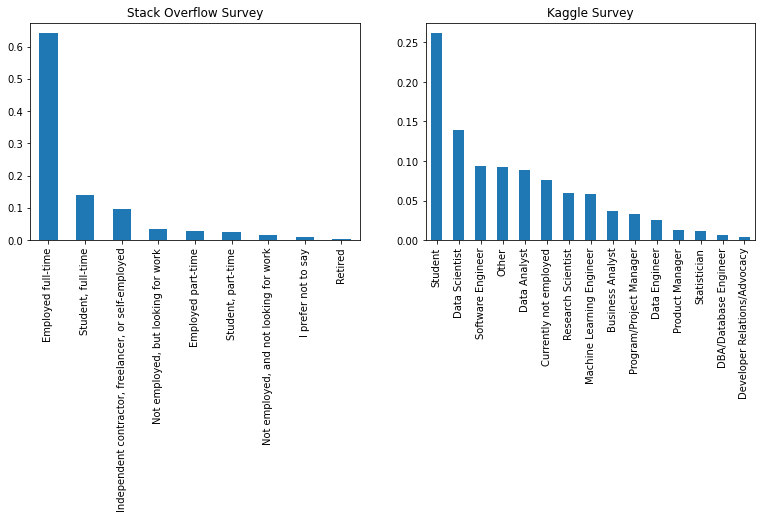

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

plt.subplot(1, 2, 1)
status_vals = so['Employment'].value_counts()
(status_vals/so.shape[0]).plot(kind="bar", ax=ax1);
ax1.set_title('Stack Overflow Survey')

plt.subplot(1, 2, 2)
status_vals = kaggle['Q5'].value_counts()
(status_vals[0:-1]/kaggle.shape[0]).plot(kind="bar", ax=ax2);
ax2.set_title('Kaggle Survey');

In [9]:
comp_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
              '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', 
              '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999',
              '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-499,999', 
              '$500,000-999,999', '>$1,000,000']

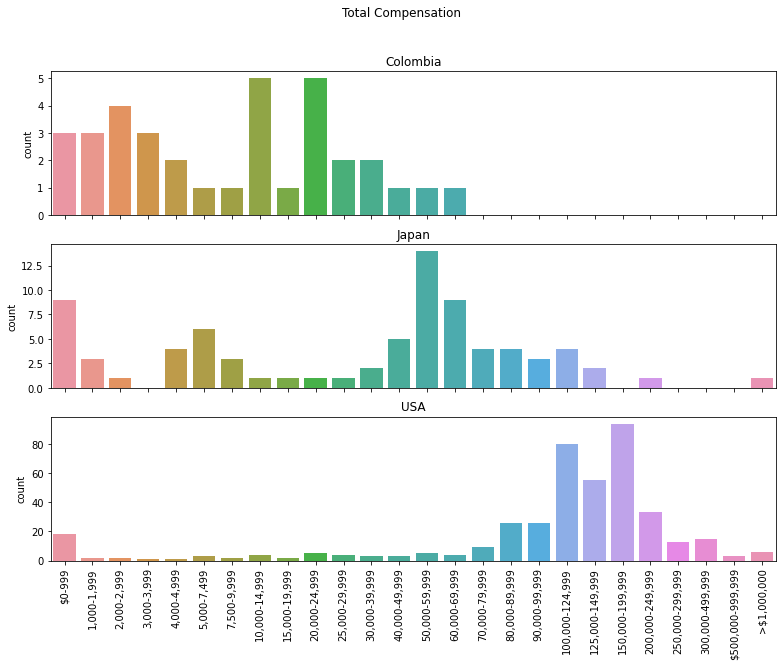

In [10]:
kaggle_ds = kaggle[kaggle['Q5']=='Data Scientist']

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(13,9))
fig.suptitle('Total Compensation')
sns.countplot(x = "Q25", data = kaggle_ds[kaggle_ds['Q3'] == 'Colombia'], order = comp_order, ax=ax1).set(xlabel=None)
ax1.set_title("Colombia")
sns.countplot(x = "Q25", data = kaggle_ds[kaggle_ds['Q3'] == 'Japan'], order = comp_order, ax=ax2).set(xlabel=None)
ax2.set_title("Japan")
sns.countplot(x = "Q25", data = kaggle_ds[kaggle_ds['Q3'] == 'United States of America'], order = comp_order, ax=ax3).set(xlabel=None)
ax3.set_title("USA")
plt.xticks(rotation=90);

We can see that there is a tremendous gap in the total compensation a data scientist receives depending on the country they are working from.

## What tools do the top 20% of the highest-paid data scientists and Stack Overflow Users use?

## Cleaning the Data

In [11]:
# We are interested in just full-employed people for this analysis.
cond = so['Employment'] == 'Employed full-time'
so_sub = so[cond]

# We are interested in just data scientists for this analysis. 
so_sub = so_sub[so_sub['DevType'].notna()]
so_sub = so_sub[so_sub['DevType'].str.contains('Data scientist')]

# We are interested in the 20% highest-paid data scientist for this analysis.
so_sub_hi = so_sub[so_sub.ConvertedCompYearly > so_sub.ConvertedCompYearly.quantile(.80)]

# Saving the bottom lowest-paid for comparison.
so_sub_btm = so_sub[so_sub.ConvertedCompYearly <= so_sub.ConvertedCompYearly.quantile(.50)]

In [12]:
so_sub_hi.shape

(508, 48)

## Analyzing the Data

In [13]:
def create_dic_so_attr(data, interesting_attr, abv=0.2):
    """
    INPUT:
    data - pandas dataframe 
    interesting_attr - The attribute from the dataframe we are interested in analyzing 
    abv - float, condition for including in the dictionary values above the abv percent
    OUTPUT:
    dic - a dictionary with the counts of each of the options of the interesting_attr
    """
    # Initialize an empty list that will be filled with possible options for the interesting_attr
    list_of_opt = []
    
    # Drop out nonrespondents from the data since we are just interested in what people openly respond to.
    interesting_attr_cln = data[interesting_attr].dropna()
    
    # Iterate over each individual and save the unique options selected by each individual in the list_of_opt list
    for indiv in interesting_attr_cln:
        indiv_split = indiv.split(';')
        for opt in indiv_split:
            if opt not in list_of_opt:
                list_of_opt.append(opt)
    
    # Create an empty dictionary that will hold the options in list_of_opt as keys and the total counts of each option 
    # as values            
    dic = {}
    
    # Iterate over each option from the list_of_opt and find the value counts of the individuals that selected that option
    for opt in list_of_opt:
        dic[opt] = interesting_attr_cln[interesting_attr_cln.str.contains(opt, regex=False)].shape[0]
        
    # Save the total number of respondants to later calculate percents
    dic['TOTAL'] = len(interesting_attr_cln)
    
    # Organize the dictionary in descending order according to its value
    dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
    
    # Return the dictonary just with the options that have have a count at least the abv rate of the TOTAL
    dic = {k: v for k, v in dic.items() if v >= dic['TOTAL']*abv}
    
    return dic

In [14]:
def create_plot(dic, figx=12):
    """
    INPUT:
    dic - a dictionary with the counts of each of the options of the attribute of interest 
    figx - The width size of the figure to be plotted 
    OUTPUT:
    a horizontal barplot from the dictionary provided with percentages over the tick labels for each of the bars created
    """
    
    # Specify the figure size in inches for both X and Y axes
    rcParams['figure.figsize'] = figx, len(dic)/4

    # Set a uniformly high contrast pallet for the plot
    base_color = sns.color_palette()[0]
    
    # Store the TOTAL count to calculate proportions 
    tot = dic.pop('TOTAL')
    
    # Plot a horizontal barplot of the dictionary provided
    sns.barplot(list(dic.values()), list(dic.keys()), color=base_color);
    plt.xlabel('Count');

    # Logic to print the proportion text on the bars
    for i in range (len(dic.keys())):
        count = list(dic.values())[i]
        # Convert count into a percentage and then into a string
        pct_string = '{:0.1f}%'.format(100*count/tot)
        # Print the string value on the bar 
        plt.text(count+1, i, pct_string, va='center')

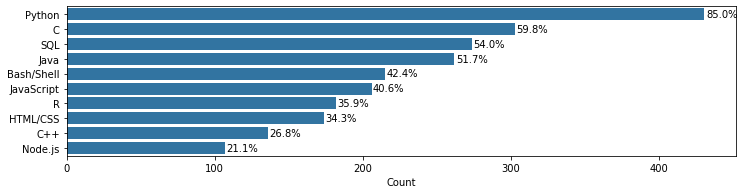

In [15]:
create_plot(create_dic_so_attr(so_sub_hi, 'LanguageHaveWorkedWith'))

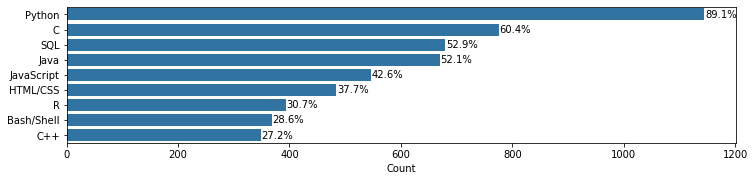

In [16]:
create_plot(create_dic_so_attr(so_sub_btm, 'LanguageHaveWorkedWith'))

###### The highest-paid data scientists appear to have done almost twice the development work over the past year with Bash / Shell compared to data scientists with lower wages.

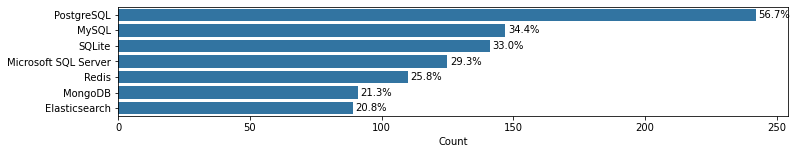

In [17]:
create_plot(create_dic_so_attr(so_sub_hi, 'DatabaseHaveWorkedWith'))

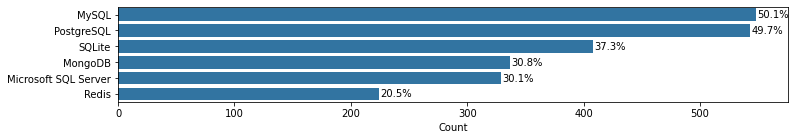

In [18]:
create_plot(create_dic_so_attr(so_sub_btm, 'DatabaseHaveWorkedWith'))

###### Higher-paid data scientists have done much more extensive development work over the past year with PostgreSQL compared with the other database environments.
###### Lower-paid data scientists have worked as much with MySQL as PostgreSQL.

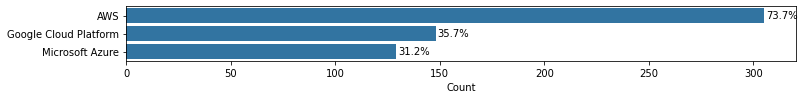

In [19]:
create_plot(create_dic_so_attr(so_sub_hi, 'PlatformHaveWorkedWith'))

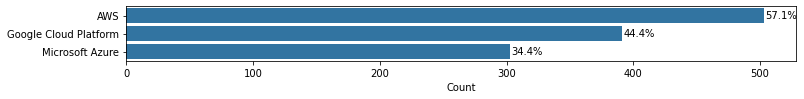

In [20]:
create_plot(create_dic_so_attr(so_sub_btm, 'PlatformHaveWorkedWith'))

###### AWS is the leader where both lower-paid and higher-paid data scientists have done more extensive development work over the past year. Strangely, notice that lower-paid data scientists have done more extensive development work with Google Cloud Platform compared to higher-paid data scientists.

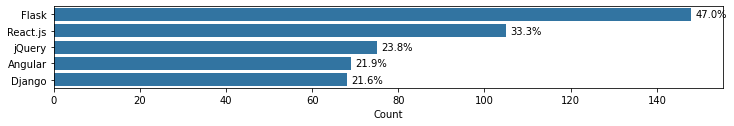

In [21]:
create_plot(create_dic_so_attr(so_sub_hi, 'WebframeHaveWorkedWith'))

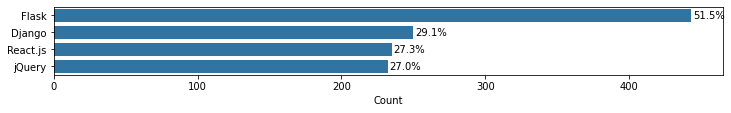

In [22]:
create_plot(create_dic_so_attr(so_sub_btm, 'WebframeHaveWorkedWith'))

###### In both groups, Flask is the most popular web framework where data scientists have done more extensive development work over the past year.

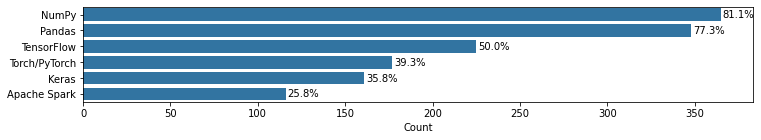

In [23]:
create_plot(create_dic_so_attr(so_sub_hi, 'MiscTechHaveWorkedWith'))

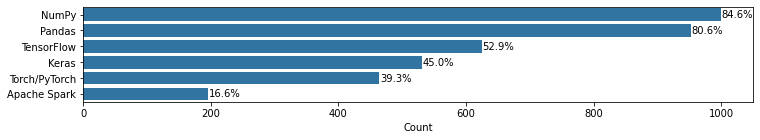

In [24]:
create_plot(create_dic_so_attr(so_sub_btm, 'MiscTechHaveWorkedWith', abv=0.16))

###### Both subsets have done extensive work with Numpy and Pandas over the past year.
###### There is a significant difference in Apache Spark, where higher-paid data scientists are about 10% more likely to have done extensive work with this technology.

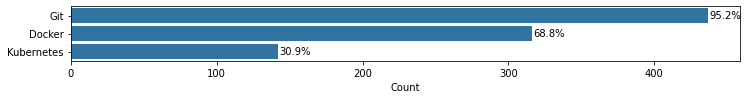

In [25]:
create_plot(create_dic_so_attr(so_sub_hi, 'ToolsTechHaveWorkedWith'))

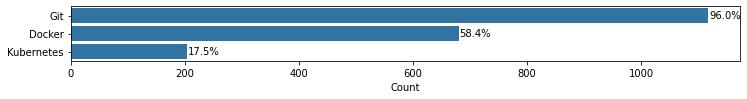

In [26]:
create_plot(create_dic_so_attr(so_sub_btm, 'ToolsTechHaveWorkedWith', abv=0.1))

###### It is about 10% more likely that a higher-paid data scientist has done more extensive work with Docker compared with lower-paid data scientists. Notice that Git is heavily used by both subsets, as commonly used as Python.

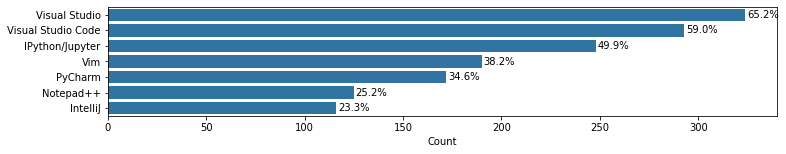

In [27]:
create_plot(create_dic_so_attr(so_sub_hi, 'NEWCollabToolsHaveWorkedWith'))

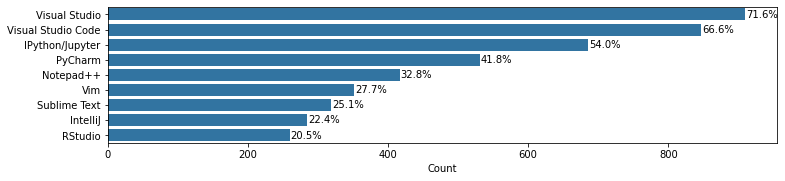

In [28]:
create_plot(create_dic_so_attr(so_sub_btm, 'NEWCollabToolsHaveWorkedWith'))

## What tools do the top 20% of the highest-paid data scientists and kaggle users use?

## Cleaning the Data

In [29]:
kaggle.shape

(25974, 369)

In [30]:
# Converting the yearly compensation from strings into integers for calculating statistics on it
mapping = {'$0-999': 999, '1,000-1,999': 1999, '2,000-2,999': 2999, '3,000-3,999': 3999, '4,000-4,999': 4999, 
           '5,000-7,499': 7499, '7,500-9,999': 9999, '10,000-14,999': 14999, '15,000-19,999': 19999, 
           '20,000-24,999': 24999, '25,000-29,999': 29999, '30,000-39,999': 39999, '40,000-49,999': 49999, 
           '50,000-59,999': 59999, '60,000-69,999': 69999, '70,000-79,999': 79999, '80,000-89,999': 89999, 
           '90,000-99,999': 99999, '100,000-124,999': 124999, '125,000-149,999': 149999, '150,000-199,999': 199999, 
           '200,000-249,999': 249999, '250,000-299,999': 299999, '300,000-499,999': 499999, '$500,000-999,999': 999999, 
           '>$1,000,000': 1000001}

kg = kaggle.replace({'Q25': mapping})

In [31]:
# We are interested in just data scientists and ML engineers in this data. Because the Stack Overflow dataset 
# grouped Data scientists and ML engineers in the same category, we'll do the same with the Kaggle dataset to keep
# consistency.
ds_kg = kg[(kg['Q5'] == 'Machine Learning Engineer') | (kg['Q5'] == 'Data Scientist')]

# We are interested in the 20% highest-paid data scientist for this analysis.
hi_sal_ds_kg = ds_kg[ds_kg['Q25'] > ds_kg['Q25'].quantile(.80)]

# Saving the bottom lowest-paid for comparison.
low_sal_ds_kg = ds_kg[ds_kg['Q25'] <= ds_kg['Q25'].quantile(.50)]
hi_sal_ds_kg.shape

(800, 369)

## Analizing the Data

In [32]:
def create_dic_kg(data, question_no, options, abv=0.2):
    """
    INPUT:
    data - kaggle dataframe
    question_no - the question number from where we want to create the dictinary
    options - The number of unique options that the question_no had
    abv - float, condition for including in the dictionary values above the abv percent
    OUTPUT:
    dic - a dictionary with the counts of each of the options of the question_no
    """
    
    # Initialize an empty list that will be filled with possible answers of the question_no
    dic = {}
    
    # Create an empty set that will store the indices of the people who responded to at least one of the options
    tot = set()
    
    # Iterate over each of the answer options for the question_no and store the counts in the dictionary 'dic'
    for o in range(options):
        
        # Save the indices of the unique respondents of the question_no into the 'tot' set
        not_null_idxs = list(data[data['Q{}_Part_{}'.format(question_no, o+1)].notna()].index)
        tot.update(not_null_idxs)
        
        # Remove whitespace from the beginning and end of the option to store it clean as a key name
        key = data['Q{}_Part_{}'.format(question_no, o+1)].value_counts().index.tolist()[0].strip()
        
        # Store the count of the answer option
        dic[key] = data['Q{}_Part_{}'.format(question_no, o+1)].value_counts()[0]
        
    # Create a key that stores the total people who responded to at least one of the options for the question_no
    dic['TOTAL'] = len(tot) 
    
    # Organize the dictionary in descending order according to its value
    dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
        
    # Return the dictonary just with the options that have have a count at least the abv rate of the TOTAL
    dic = {k: v for k, v in dic.items() if v >= dic['TOTAL']*abv}
        
    return dic

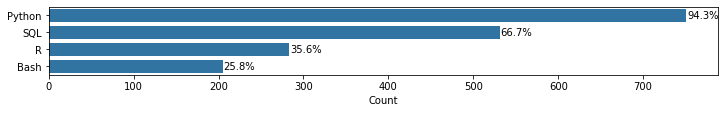

In [33]:
create_plot(create_dic_kg(hi_sal_ds_kg, 7, 12))

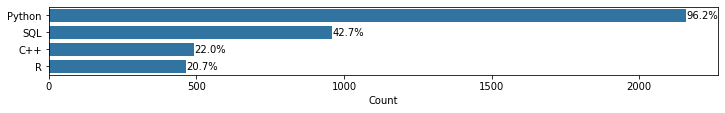

In [34]:
create_plot(create_dic_kg(low_sal_ds_kg, 7, 12))

###### Python is heavily used by all data scientists, but SQL seems to be much more used by highly-paid Data Scientists.

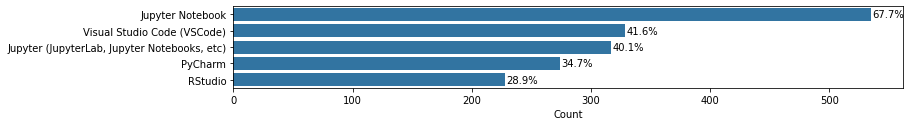

In [35]:
create_plot(create_dic_kg(hi_sal_ds_kg, 9, 12))

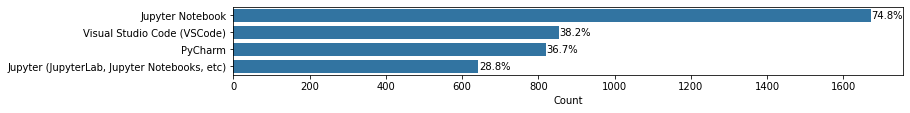

In [36]:
create_plot(create_dic_kg(low_sal_ds_kg, 9, 12))

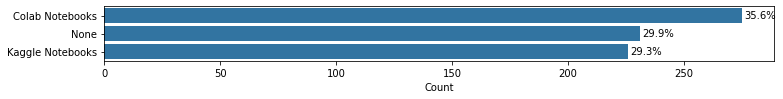

In [37]:
create_plot(create_dic_kg(hi_sal_ds_kg, 10, 16))

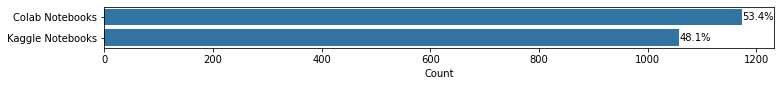

In [38]:
create_plot(create_dic_kg(low_sal_ds_kg, 10, 16))

###### Lower-paid data scientists tend to use more hosted notebook products on a regular basis

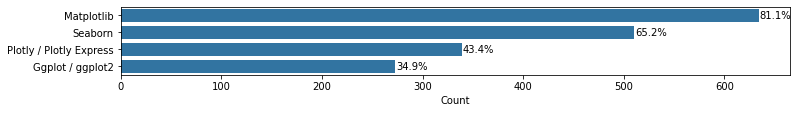

In [39]:
create_plot(create_dic_kg(hi_sal_ds_kg, 14, 11))

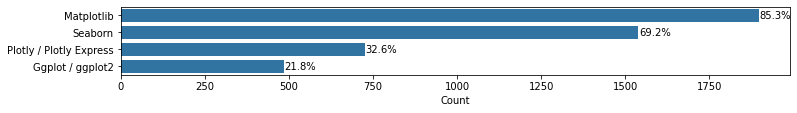

In [40]:
create_plot(create_dic_kg(low_sal_ds_kg, 14, 11))

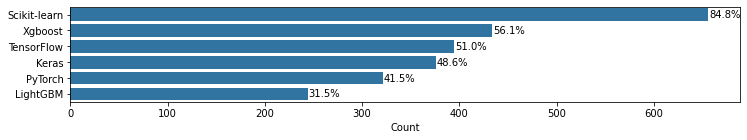

In [41]:
create_plot(create_dic_kg(hi_sal_ds_kg, 16, 17))

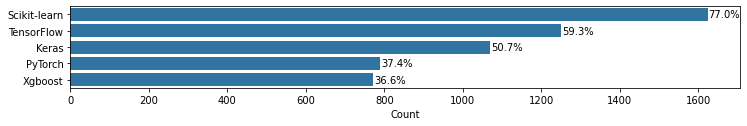

In [42]:
create_plot(create_dic_kg(low_sal_ds_kg, 16, 17))

###### On average, there is a 20% higher chance that a higher-paid data scientist has used the Xgboost framework compared to a lower-paid data scientist. Higher-paid data scientists, on average, have also worked more with Scikit-learn.
###### Interestingly, we also noticed that lower-paid data scientists tend to use more TensorFlow and Keras than higher-paid data scientists.

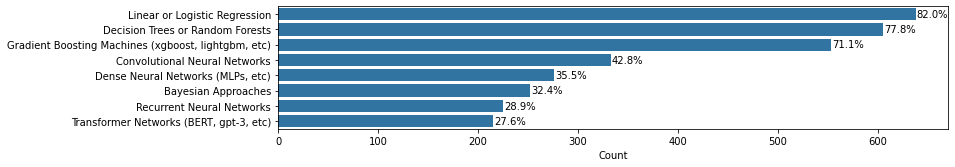

In [43]:
create_plot(create_dic_kg(hi_sal_ds_kg, 17, 11))

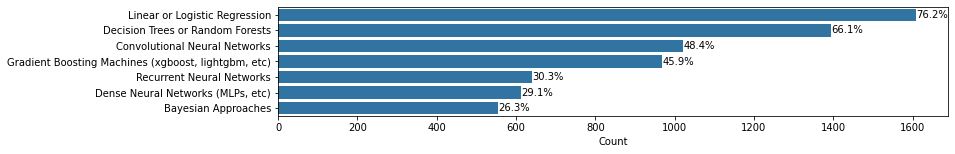

In [44]:
create_plot(create_dic_kg(low_sal_ds_kg, 17, 11))

###### The highest paid data scientists tend to use more ML algorithms and significantly more Gradient Boosting Machines.
###### On average, data scientists with the lowest salaries work more with TensorFlow, Keras, and Convolutional Neural Networks.

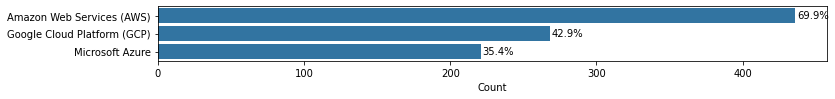

In [45]:
create_plot(create_dic_kg(hi_sal_ds_kg, '27_A', 9))

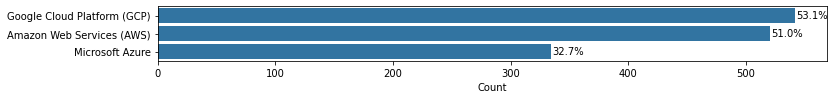

In [46]:
create_plot(create_dic_kg(low_sal_ds_kg, '27_A', 9))

In [47]:
def rel_freq_plot(data, arg, prop_incr, figx=12):
    """
    INPUT:
    data - pandas dataframe 
    arg - the argument interested in plotting 
    prop_incr - the step size of the evenly spaced proportioned values for the X-axis of the plot
    OUTPUT:
    a horizontal bar plot with the relative frequency count on the X-axis
    """
    
    # Returns the sum of all not-null values in arg column
    tot_no = data[arg].value_counts().sum()

    # Return the highest frequency in the arg column
    max_type_count = data[arg].value_counts()[0]

    # Compute the length of the longest bar in terms of the proportion
    max_prop = max_type_count / tot_no

    # Use numpy.arange() function to produce a set of evenly spaced proportioned values 
    # between 0 and max_prop, with a step size prop_incr
    tick_props = np.arange(0, max_prop, prop_incr)
    tick_props

    # Use a list comprehension to create tick_names that we will apply to the tick labels. 
    # Pick each element `v` from the `tick_props`, and convert it into a formatted string.
    # `{:0.2f}` denotes that before formatting, with 2 digits of precision and `f` is used to represent floating point number.
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    # Set a uniformly high contrast pallet for the plot
    base_color = sns.color_palette()[0]
    
    # Specify the figure size in inches for both X and Y axes
    rcParams['figure.figsize'] = figx, data[arg].value_counts().shape[0]/4
    
    sns.countplot(data=data, y=arg, color=base_color, order=data[arg].value_counts().index);
    # Change the tick locations and labels
    plt.xticks(tick_props * tot_no, tick_names)
    plt.xlabel('proportion');

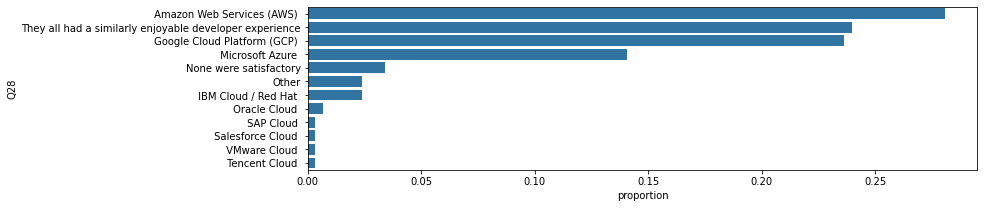

In [48]:
rel_freq_plot(hi_sal_ds_kg, 'Q28', 0.05)

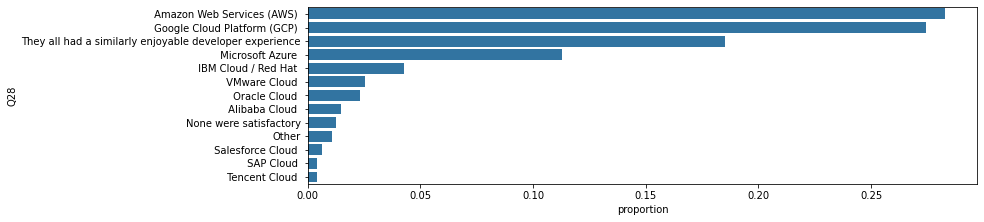

In [49]:
rel_freq_plot(low_sal_ds_kg, 'Q28', 0.05)

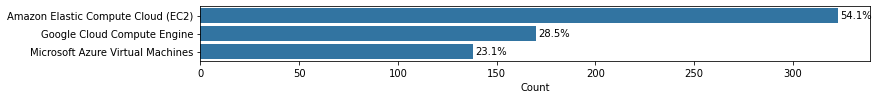

In [50]:
create_plot(create_dic_kg(hi_sal_ds_kg, '29_A', 4))

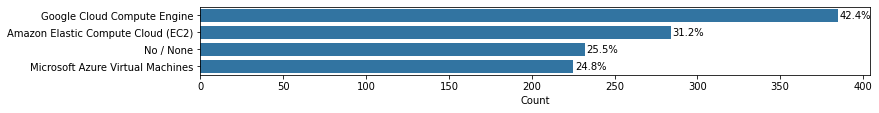

In [51]:
create_plot(create_dic_kg(low_sal_ds_kg, '29_A', 4))

###### Data scientists with high salaries have done more development work with AWS. Lower-salary data scientists have done more development work with GCP.

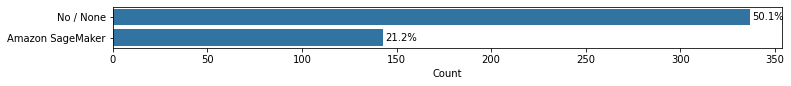

In [52]:
create_plot(create_dic_kg(hi_sal_ds_kg, '31_A', 9))

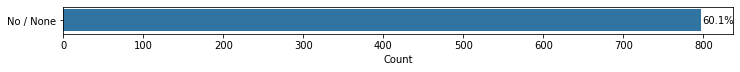

In [53]:
create_plot(create_dic_kg(low_sal_ds_kg, '31_A', 9))

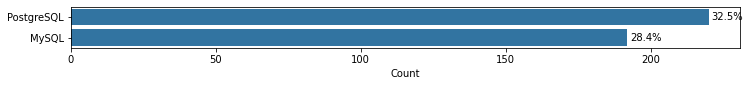

In [54]:
create_plot(create_dic_kg(hi_sal_ds_kg, '32_A', 20))

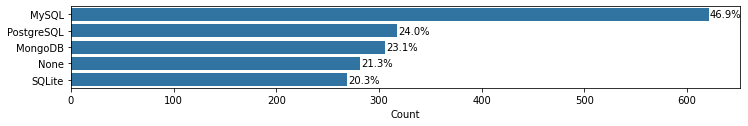

In [55]:
create_plot(create_dic_kg(low_sal_ds_kg, '32_A', 20))

###### Highest paid data scientists have worked more with PostgreSQL and less with MySQL or SQLite. And, on average, lower-paid data scientists have worked more with MySQL than the highest-paid data scientists.

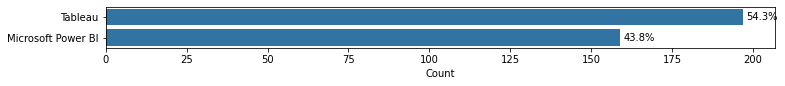

In [56]:
create_plot(create_dic_kg(hi_sal_ds_kg, '34_A', 8))

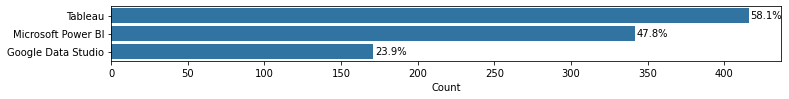

In [57]:
create_plot(create_dic_kg(low_sal_ds_kg, '34_A', 8))

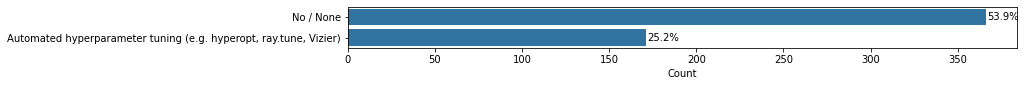

In [58]:
create_plot(create_dic_kg(hi_sal_ds_kg, '36_A', 7))

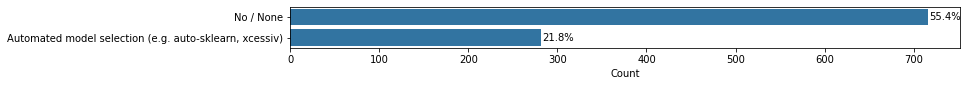

In [59]:
create_plot(create_dic_kg(low_sal_ds_kg, '36_A', 7))

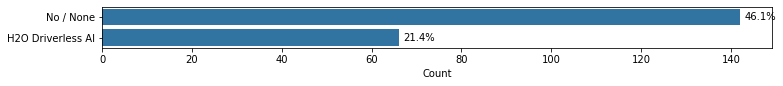

In [60]:
create_plot(create_dic_kg(hi_sal_ds_kg, '37_A', 7))

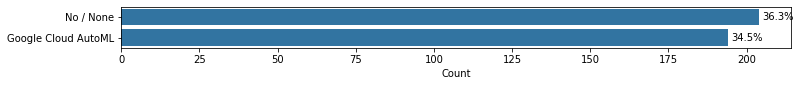

In [61]:
create_plot(create_dic_kg(low_sal_ds_kg, '37_A', 7))

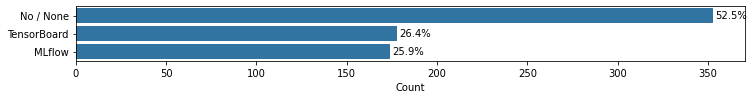

In [62]:
create_plot(create_dic_kg(hi_sal_ds_kg, '38_A', 11))

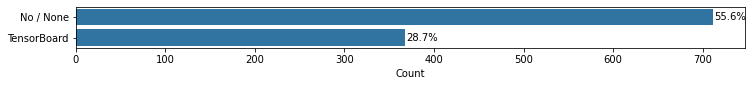

In [63]:
create_plot(create_dic_kg(low_sal_ds_kg, '38_A', 11))

# What is the primary operating system in which they work?

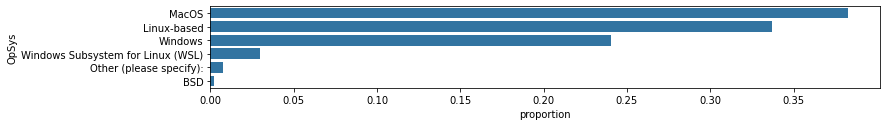

In [64]:
rel_freq_plot(so_sub_hi, 'OpSys', 0.05)

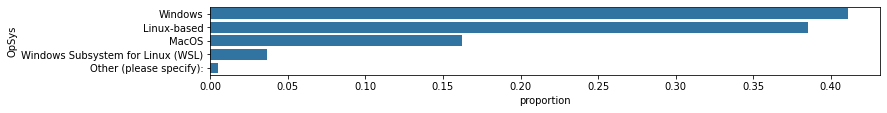

In [65]:
rel_freq_plot(so_sub_btm, 'OpSys', 0.05)

###### The highest-paid data scientists work more with MacOS and less with Windows, whereas the lowest-paid data scientists work more with Windows and less with MacOs.

# How do the top 20% highest-paid data scientist approach learning?

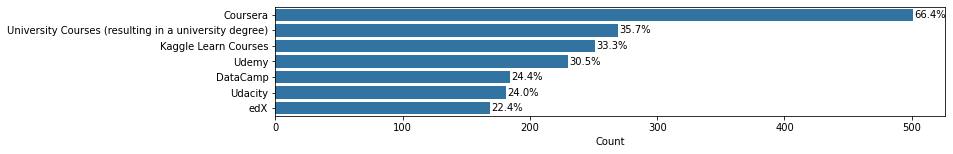

In [66]:
create_plot(create_dic_kg(hi_sal_ds_kg, 40, 11))

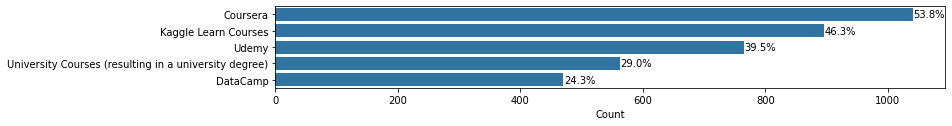

In [67]:
create_plot(create_dic_kg(low_sal_ds_kg, 40, 11))

###### Coursera is clearly the platform of choice for online data science courses for the highest paid data scientists

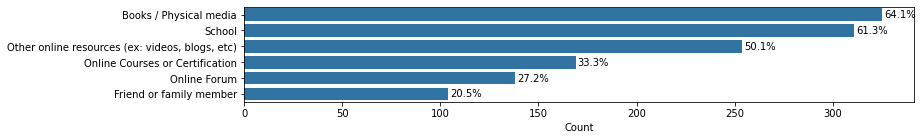

In [68]:
create_plot(create_dic_so_attr(so_sub_hi, 'LearnCode'))

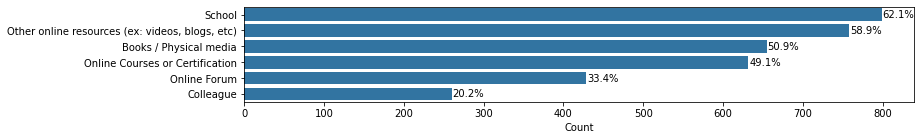

In [69]:
create_plot(create_dic_so_attr(so_sub_btm, 'LearnCode'))

###### Books seem to be the most effective way to learn to code for higher-paid data scientist, there is about 14% higher chance that a higher-paid data scientist learn to code with books compared to a lower-paid data scientist

# Sharing and Visualizing

### Preparing the Visualizations

In [70]:
def clus_bar_cht(hi_dic, low_dic, title, figheight=5, figwidth=5, horiz=False):
    """
    INPUT:
    hi_dic - dictionary of the high salary subset 
    low_dic - dictionary of the lower salary subset
    title - string, title of the plot
    figheight - float, height of the figure
    figwidth - float, width of the figure
    horiz - boolean, true if want to make the plot horizontal
    OUTPUT:
    clustered bar chart
    """

    # Store the TOTAL count to calculate proportions 
    tot_hi = hi_dic.pop('TOTAL')
    tot_low = low_dic.pop('TOTAL')
    
    # Initialize an empty list that will be filled with the values to be plotted
    hi_sal = []
    low_sal = []
    
    # Create a list for the position of the labels
    labels = list(hi_dic.keys())
    
    # Calculate the percent of each value and store it in the list that will be plotted
    for label in labels:
        hi_sal.append(round(hi_dic[label]/tot_hi*100, 1))
        low_sal.append(round(low_dic[label]/tot_low*100, 1))

    width = 0.35  # the width of the bars

    # Draw the canvas of the plot
    fig, ax = plt.subplots()
    fig.set_figheight(figheight)
    fig.set_figwidth(figwidth)
    style.use('seaborn-white')
        
    if horiz:
        # Reverse the order of the list so that higher probablity values for hi_sal get plotter first
        hi_sal = hi_sal[::-1]
        low_sal = low_sal[::-1]
        labels = labels[::-1]
        y = np.arange(len(labels))# the label locations
        rects1 = ax.barh(y + width/2, hi_sal, width, label='High', color='C1')
        rects2 = ax.barh(y - width/2, low_sal, width, label='Low', color='C0')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_xlabel('Percent', fontsize=15)
        ax.set_yticks(y)
        ax.set_yticklabels(labels, fontsize=15)
        plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize=15);
        ax.legend(title="Salary", fontsize=12, title_fontsize='x-large')
    else:
        x = np.arange(len(labels))# the label locations
        rects2 = ax.bar(x + width/2, low_sal, width, label='Low')
        rects1 = ax.bar(x - width/2, hi_sal, width, label='High')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Percent', fontsize=15)
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontsize=15)
        plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize=15);
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], title="Salary", fontsize=12, title_fontsize='x-large')
    
    ax.set_title(title, pad=20, fontsize=18)

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)

    fig.tight_layout()

    plt.show()

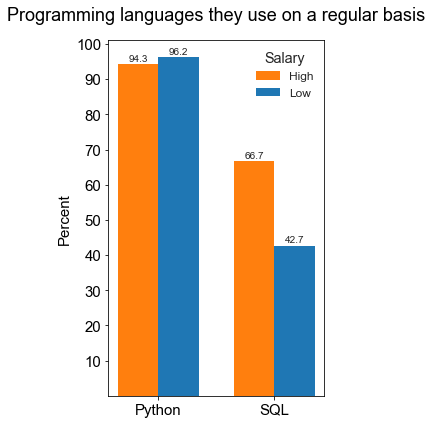

In [71]:
hi_dic = create_dic_kg(hi_sal_ds_kg, 7, 12, abv=0.4)
low_dic = create_dic_kg(low_sal_ds_kg, 7, 12, abv=0.4)
clus_bar_cht(hi_dic, low_dic, title='Programming languages they use on a regular basis', figheight=6, figwidth=4)

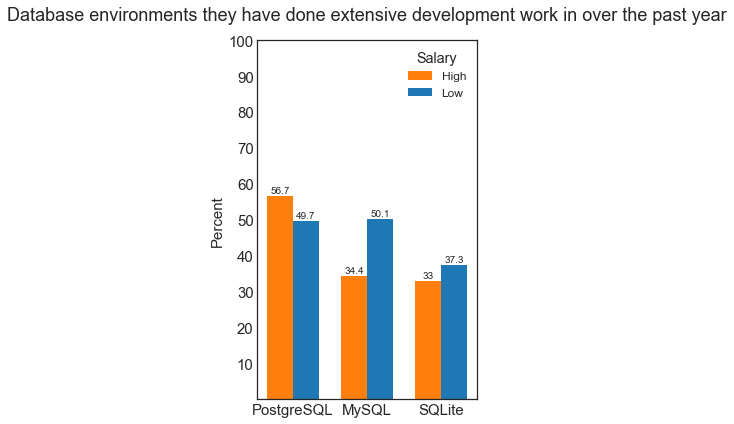

In [72]:
hi_dic = create_dic_so_attr(so_sub_hi, 'DatabaseHaveWorkedWith', abv=0.32)
low_dic = create_dic_so_attr(so_sub_btm, 'DatabaseHaveWorkedWith', abv=0.32)
clus_bar_cht(hi_dic, low_dic, 
             title='Database environments they have done extensive development work in over the past year', 
             figheight=6, figwidth=4)

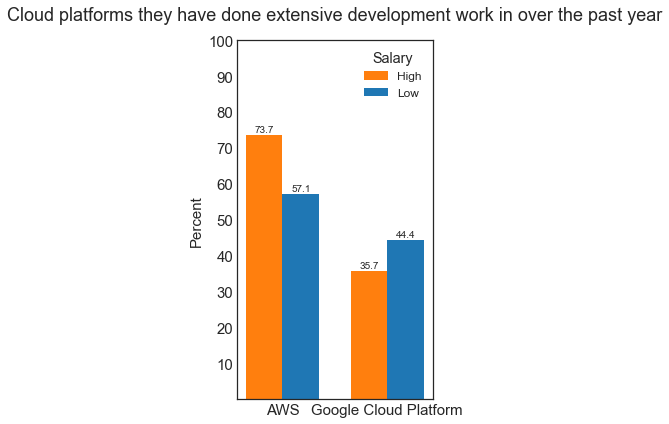

In [73]:
hi_dic = create_dic_so_attr(so_sub_hi, 'PlatformHaveWorkedWith', abv=0.35)
low_dic = create_dic_so_attr(so_sub_btm, 'PlatformHaveWorkedWith', abv=0.35)
clus_bar_cht(hi_dic, low_dic, title='Cloud platforms they have done extensive development work in over the past year', 
             figheight=6, figwidth=4)

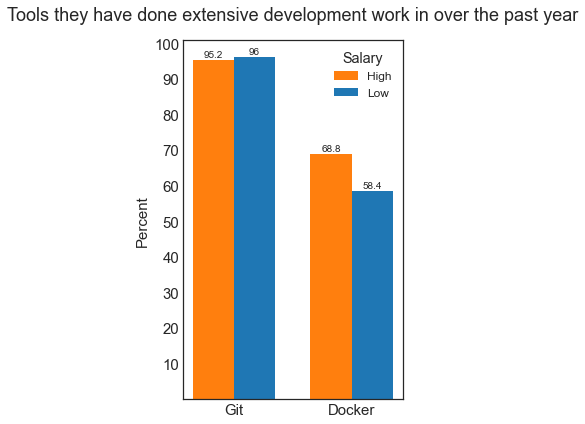

In [74]:
hi_dic = create_dic_so_attr(so_sub_hi, 'ToolsTechHaveWorkedWith', abv=0.5)
low_dic = create_dic_so_attr(so_sub_btm, 'ToolsTechHaveWorkedWith', abv=0.5)
clus_bar_cht(hi_dic, low_dic, title='Tools they have done extensive development work in over the past year', 
             figheight=6, figwidth=4)

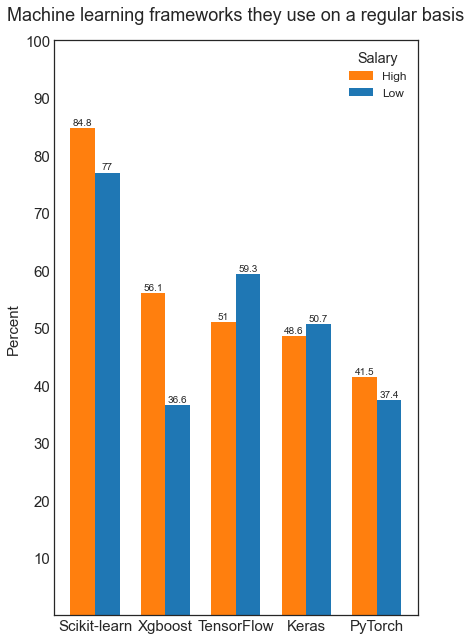

In [75]:
hi_dic = create_dic_kg(hi_sal_ds_kg, 16, 17, abv=0.35)
low_dic = create_dic_kg(low_sal_ds_kg, 16, 17, abv=0.35)
clus_bar_cht(hi_dic, low_dic, title='Machine learning frameworks they use on a regular basis', 
             figheight=9, figwidth=6)

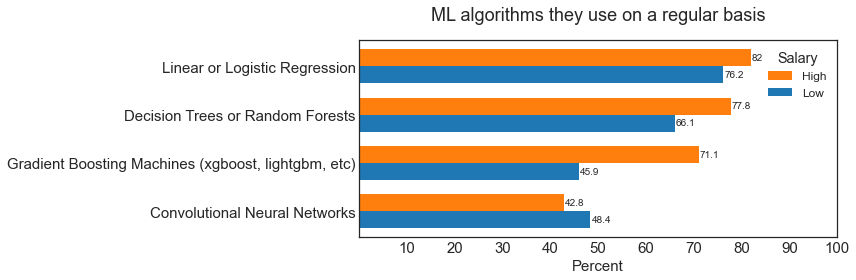

In [76]:
hi_dic = create_dic_kg(hi_sal_ds_kg, 17, 11, abv=0.4)
low_dic = create_dic_kg(low_sal_ds_kg, 17, 11, abv=0.4)
clus_bar_cht(hi_dic, low_dic, title='ML algorithms they use on a regular basis', 
             horiz=True, figheight=4, figwidth=12)

In [77]:
opsys_hi = so_sub_hi['OpSys'].value_counts()[:3].append(pd.Series(so_sub_hi['OpSys'].value_counts()[3:].sum(), index=['Other']))
opsys_hi.index

Index(['MacOS', 'Linux-based', 'Windows', 'Other'], dtype='object')

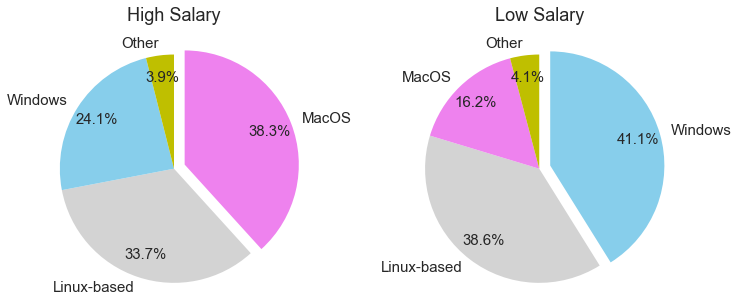

In [78]:
opsys_hi = so_sub_hi['OpSys'].value_counts()[:3].append(pd.Series(so_sub_hi['OpSys'].value_counts()[3:].sum(), index=['Other']))

opsys_low = so_sub_btm['OpSys'].value_counts()[:3].append(pd.Series(so_sub_btm['OpSys'].value_counts()[3:].sum(), index=['Other']))
 
# display the figure to see whats the problem
fig, (ax1, ax2) = plt.subplots(1, 2)
style.use('seaborn-white')
# fig.suptitle('Primary operating system in which they work', fontsize=15, y=2)
explode = (0.3, 0, 0, 0)
                                                        
colors={'MacOS':'violet', 'Windows':'skyblue', 'Linux-based':'lightgrey', 'Other':'y'}

ax1.pie(opsys_hi.values, labels = opsys_hi.index, startangle = 90, counterclock = False, radius=3, explode=explode, 
        autopct='%1.1f%%', colors=[colors[v] for v in opsys_hi.index], textprops={'fontsize': 15}, pctdistance=0.8);

ax2.pie(opsys_low.values, labels = opsys_low.index, startangle = 90, counterclock = False, radius=3, explode=explode, 
       autopct='%1.1f%%', colors=[colors[v] for v in opsys_low.index], textprops={'fontsize': 15}, pctdistance=0.8);

ax1.set_title('High Salary', pad=100, fontsize=18);
ax2.set_title('Low Salary', pad=100, fontsize=18);

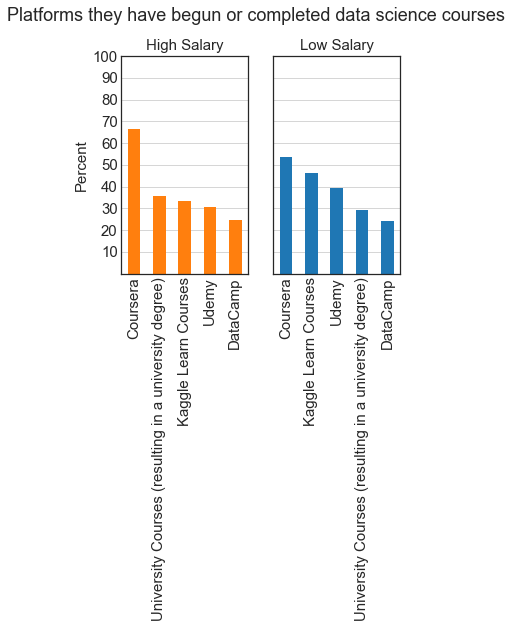

In [79]:
# Create the dictionaries with the values for the high and low salary subsets
dic_hi = create_dic_kg(hi_sal_ds_kg, 40, 11, abv=0.241)
dic_low = create_dic_kg(low_sal_ds_kg, 40, 11, abv=0.241)

# Store the TOTAL count to calculate proportions 
tot_hi = dic_hi.pop('TOTAL')
tot_low = dic_low.pop('TOTAL')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(5,4))
fig.suptitle('Platforms they have begun or completed data science courses', fontsize=18, y=1.05)
style.use('seaborn-white')

# Draw the left bar chart
plt.subplot(1, 2, 1)
(pd.Series(dic_hi)/tot_hi*100).plot(kind="bar", ax=ax1, color='C1',fontsize=15);
ax1.set_title('High Salary', fontsize=15)
ax1.set_ylabel('Percent', fontsize=15)
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);
plt.grid(visible=True, axis='y')

# Draw the right bar chart
plt.subplot(1, 2, 2)
(pd.Series(dic_low)/tot_low*100).plot(kind="bar", ax=ax2, color='C0',fontsize=15, sharey=True);
ax2.set_title('Low Salary', fontsize=15);
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);
plt.grid(visible=True, axis='y')

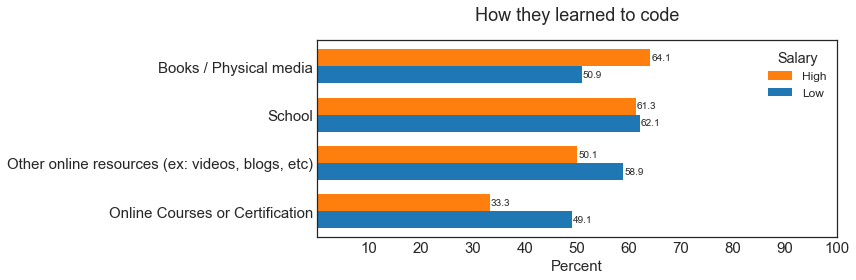

In [80]:
hi_dic = create_dic_so_attr(so_sub_hi, 'LearnCode', abv=0.3)
low_dic = create_dic_so_attr(so_sub_btm, 'LearnCode', abv=0.4)
clus_bar_cht(hi_dic, low_dic, title='How they learned to code', horiz=True, figheight=4, figwidth=12)